# Fourier transform

The Fourier transforms allows to determine which are the main frequencies of a signal. It is possible to work with a periodic set of data or with a recorded signal, like the acceleration measured from a structure.

### Function-generated data
As a first approach, generate a timeseries using a periodic function

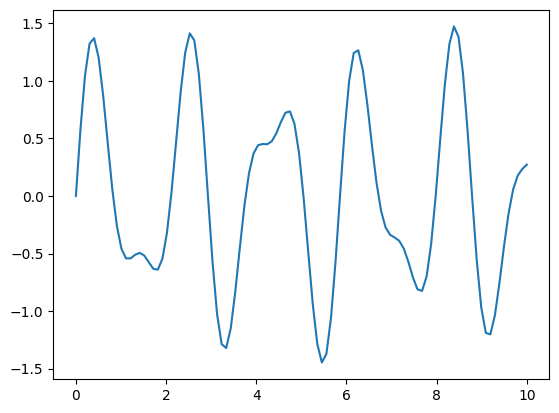

In [1]:
import numpy as np
t = np.linspace(start=0, stop=10, num=100)
a = np.sin(3.2*t) + 0.5*np.sin(5.4*t)

import matplotlib.pyplot as plt
plt.plot(t, a)
plt.show()

### Read from a dataset
After finishing the Fourier transform (see cells below), got again to this cell and overwrite the timeseries using data from a file. You can use the function `numpy.loadtxt`

In [ ]:
# Import data
t, a = np.loadtxt('../acc.csv', skiprows=1, delimiter=',', usecols=(0,1), unpack=True)
plt.plot(t, a)
plt.show()

The output of the transform is a complex-valued function of frequency. It allows to transform a function from time domain to frequency domain ($f(t)\rightarrow\hat{f}(\omega)$),
$$
\hat f(\omega) = \int_{-\infty}^\infty f(t)e^{-i\omega t} dt
$$

Note: the Fourier transform can be interpreted as a real cosine and an imaginary sine. Additionally, the frequencies can be both positive and negative. Then, we need to clean the output returned by the Python library. The operator `[:n//2]` will take the first half of the output.

In [2]:
from scipy.fft import fft, fftfreq
n = len(t)
dt = t[1] - t[0]
spectrum = fft(a)[:n//2]
frequencies = fftfreq(n, dt/2/np.pi)[:n//2]

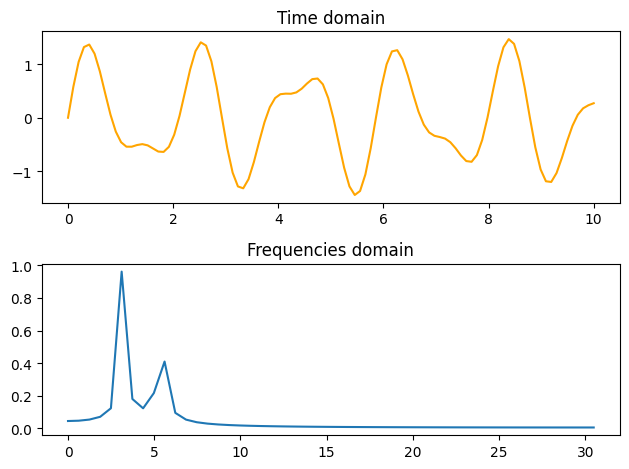

In [3]:
import matplotlib.pyplot as plt
plt.subplot(211)
plt.plot(t, a, color='orange')
plt.title('Time domain')
plt.subplot(212)
plt.plot(frequencies, 2/n * np.abs(spectrum))
plt.title('Frequencies domain')
plt.tight_layout()
plt.show()